# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime, date

# Fixing random state for reproducibility
np.random.seed(2360873)
N = 100


In [40]:
renda = pd.read_csv('renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

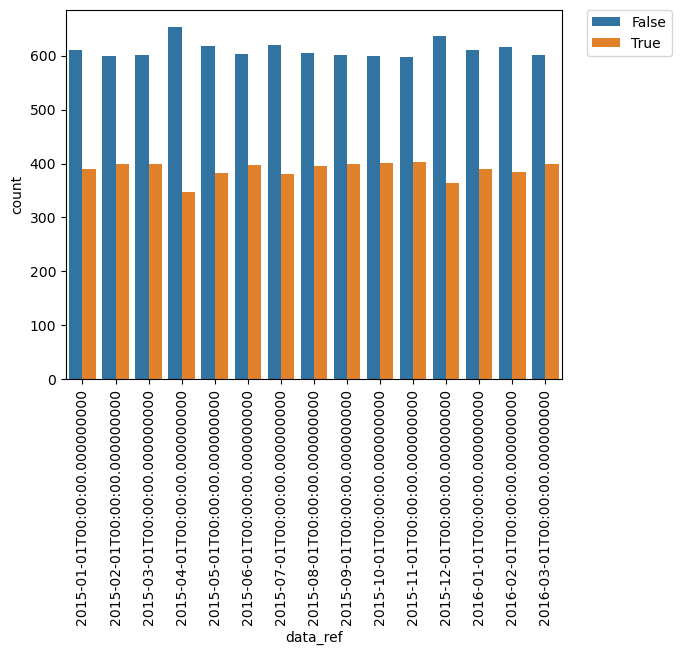

In [55]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=renda)

tick_labs = renda['data_ref'].map(lambda ts: datetime.strptime(ts[:7], "%Y-%m")).unique()


# tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

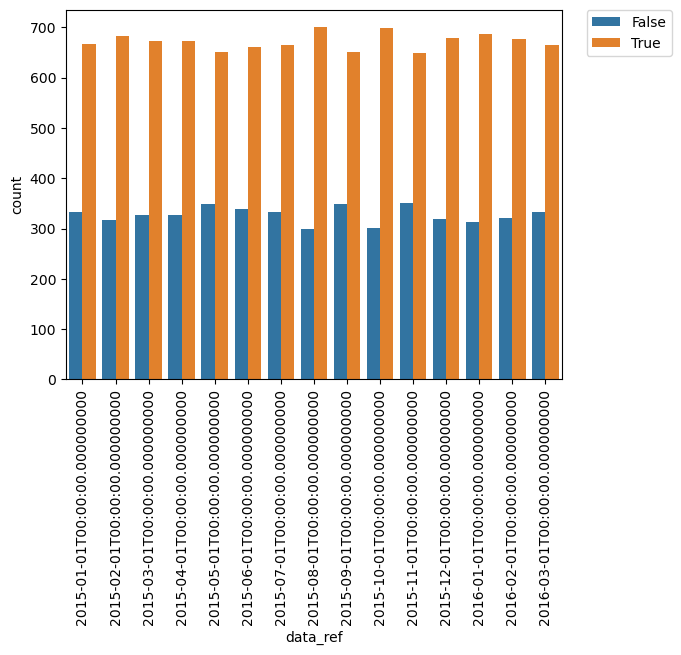

In [42]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=renda)

tick_labs = renda['data_ref'].map(lambda ts: datetime.strptime(ts[:7], "%Y-%m")).unique()


# tick_labs.tolist()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

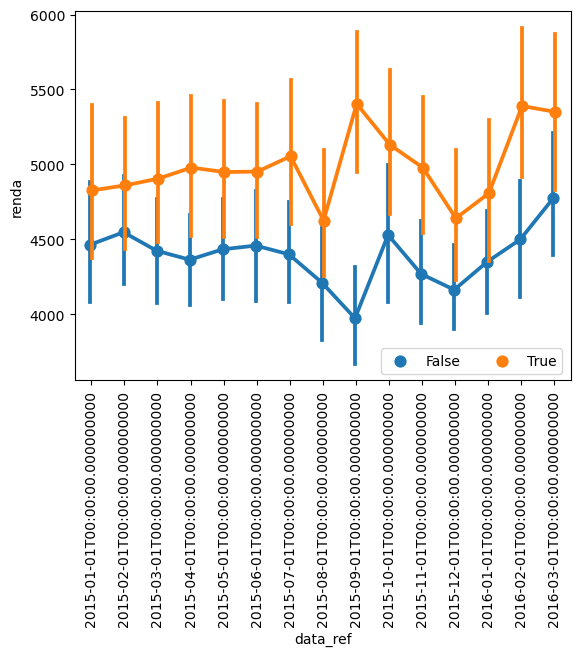

In [70]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=renda, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: datetime.strptime(ts[:7], "%Y-%m")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.8, .00),ncol = 3)

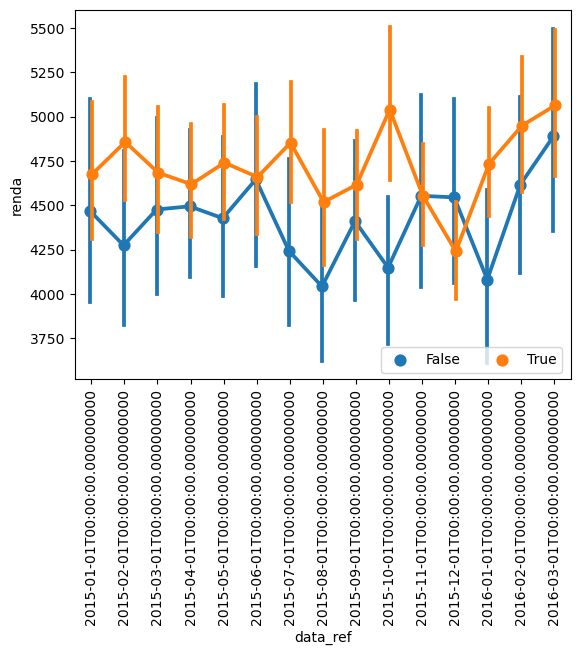

In [71]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=renda, dodge=True, errorbar=('ci', 95))

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = renda['data_ref'].map(lambda ts: datetime.strptime(ts[:7], "%Y-%m")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.8, .00),ncol = 3)

Com o gráfico de distribuição das médias é possível identificar alterações nos meses de Setembro/2015 (posse_de_veiculo) e Outubro/2015 (posse_de_imovel). Após validar a consistência dos dados, se confirmada a alteração, não é possível utilizá-las no modelo.